In [1]:
from pandas import Series,DataFrame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:\\Windows\\Fonts\\batang.ttc"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [4]:
df_cus=pd.read_csv("cus_info.csv") # 고객 및 주거래계좌 정보
df_iem=pd.read_csv("iem_info_20210902.csv")
df_stk=pd.read_csv("stk_bnc_hist.csv")

df_train=pd.read_csv("stk_hld_train.csv")
df_test=pd.read_csv("stk_hld_test.csv")

In [5]:
df_stk

,act_id,bse_dt,iem_cd,bnc_qty,tot_aet_amt,stk_par_pr
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,A005930,40.0,2320000.0,100.0
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A005930,20.0,1028000.0,100.0
...,...,...,...,...,...,...
2573834,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200806,A035720,1.0,364000.0,500.0
2573835,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200813,A035720,0.0,0.0,500.0
2573836,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200819,A035720,1.0,376500.0,500.0
2573837,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200825,A035720,0.0,0.0,500.0


In [7]:
df_test

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A131760,20200120,236,IDX00004,0
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A293490,20201217,9,IDX00005,0
...,...,...,...,...,...,...
70591,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A000810,20201127,23,IDX70592,0
70592,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A005945,20200731,103,IDX70593,0
70593,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A004740,20170704,858,IDX70594,0
70594,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A001630,20201215,11,IDX70595,0


In [8]:
df_cus.rename(columns={"act_id": "계좌ID",
"sex_dit_cd": "성별",
"cus_age_stn_cd":"연령대",
"ivs_icn_cd":"투자성향",
"cus_aet_stn_cd":"자산구간",
"mrz_pdt_tp_sgm_cd":"주거래상품군",
"lsg_sgm_cd": "Life Style",
"tco_cus_grd_cd": "서비스 등급",
"tot_ivs_te_sgm_cd":"총 투자기간",
"mrz_btp_dit_cd":"주거래업종구분"}, inplace=True)

In [9]:
df_cus

,계좌ID,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...
9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [10]:
df_iem.rename(columns={"iem_cd": "종목코드",
"iem_krl_nm": "종목한글명",
"btp_cfc_cd": "종목업종",
"mkt_pr_tal_scl_tp_cd": "시가총액 규모유형",
"stk_dit_cd": "시장구분"}, inplace=True)

In [11]:
df_iem

,종목코드,종목한글명,종목업종,시가총액 규모유형,시장구분
0,A000020,동화약품,8,2,99
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,5,3,99
3,A000227,유유제약2우B,8,99,99
4,A000325,노루홀딩스우,2,99,99
...,...,...,...,...,...
3074,A383310,에코프로에이치엔,14,99,99
3075,A385520,KODEX K-미래차액티브,14,99,99
3076,A388280,KBSTAR Fn컨택트대표,14,99,99
3077,A388420,KBSTAR 비메모리반도체액티브,14,99,99


In [12]:
df_ien_section=df_iem.groupby("시장구분")["종목코드"].count()

<AxesSubplot:xlabel='시장구분', ylabel='종목코드'>

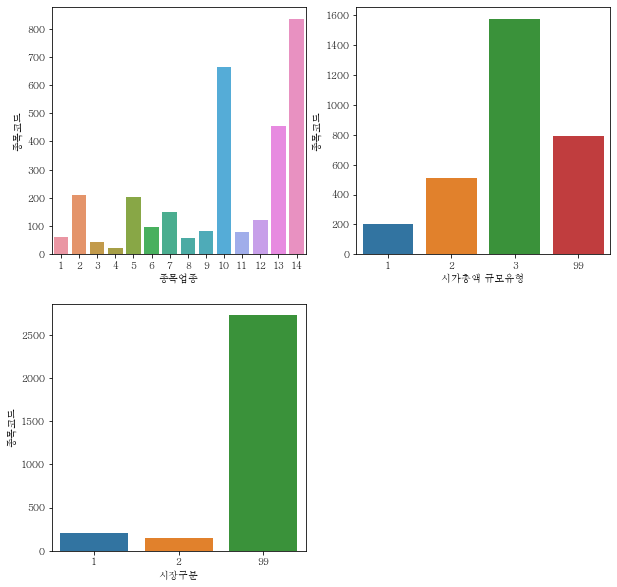

In [13]:
df_iem_event=df_iem.groupby('종목업종')["종목코드"].count()
df_iem_kind=df_iem.groupby( "시가총액 규모유형")["종목코드"].count()
df_iem_section=df_iem.groupby("시장구분")["종목코드"].count()

fig  = plt.figure(figsize=(10,10))

left = 0.124
right = 0.6
bottom = 0.1
top = 0.9
wspace = 0.5
hspace = 0.1


ax_1 = fig.add_subplot(2,2,1)
ax_2 = fig.add_subplot(2,2,2)
ax_3 = fig.add_subplot(2,2,3)


sns.barplot(x=df_iem_event.index,y=df_iem_event,ax=ax_1,)
sns.barplot(x=df_iem_kind.index,y=df_iem_kind,ax=ax_2)
sns.barplot(x=df_iem_section.index,y=df_iem_section,ax=ax_3)


In [14]:
df_stk

,act_id,bse_dt,iem_cd,bnc_qty,tot_aet_amt,stk_par_pr
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,A005930,40.0,2320000.0,100.0
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A005930,20.0,1028000.0,100.0
...,...,...,...,...,...,...
2573834,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200806,A035720,1.0,364000.0,500.0
2573835,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200813,A035720,0.0,0.0,500.0
2573836,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200819,A035720,1.0,376500.0,500.0
2573837,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200825,A035720,0.0,0.0,500.0


In [15]:
df_stk.rename(columns={"act_id": "계좌ID",
"bse_dt": "기준일자",
"iem_cd": "종목코드",
"bnc_qty": "잔고수량",
"tot_aet_amt": "잔고금액",
"stk_par_pr":"주당 액면가"}, inplace=True)

In [16]:
df_stk

,계좌ID,기준일자,종목코드,잔고수량,잔고금액,주당 액면가
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,A005930,40.0,2320000.0,100.0
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A005930,20.0,1028000.0,100.0
...,...,...,...,...,...,...
2573834,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200806,A035720,1.0,364000.0,500.0
2573835,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200813,A035720,0.0,0.0,500.0
2573836,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200819,A035720,1.0,376500.0,500.0
2573837,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200825,A035720,0.0,0.0,500.0


# cus_info  고객 및 주거래계좌 정보 데이터 실습

In [17]:
df_cus

,계좌ID,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...
9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [18]:
df_cus.keys()

Index(['계좌ID', '성별', '연령대', '투자성향', '자산구간', '주거래상품군', 'Life Style', '서비스 등급',
       '총 투자기간', '주거래업종구분'],
      dtype='object')

In [19]:
df_cus['Life Style'].unique()

array([3, 5, 4, 7, 6, 9, 2, 8], dtype=int64)

In [20]:
df_cus[['계좌ID','성별']].head(3)

,계좌ID,성별
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2


In [21]:
df_cus.describe()

,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000
mean,1.401500,4.682300,38.5298,2.431100,2.05820,4.46250,6.090900,2.682100,10.41980
std,0.490226,2.138744,46.2249,1.482118,0.59283,1.91169,6.167596,0.986173,3.96287
min,1.000000,1.000000,0.0000,1.000000,1.00000,2.00000,1.000000,1.000000,1.00000
25%,1.000000,3.000000,3.0000,1.000000,2.00000,3.00000,4.000000,2.000000,8.00000
50%,1.000000,5.000000,4.0000,2.000000,2.00000,5.00000,5.000000,3.000000,10.00000
75%,2.000000,6.000000,99.0000,4.000000,2.00000,5.00000,9.000000,3.000000,14.00000
max,2.000000,9.000000,99.0000,6.000000,15.00000,9.00000,99.000000,6.000000,16.00000


In [22]:
a=df_cus.groupby(["자산구간", "서비스 등급"])["성별"].sum()

In [23]:
a.unstack()

서비스 등급,1,2,3,4,5,9,99
자산구간,,,,,,,
1,2.0,6.0,34.0,133.0,601.0,4331.0,50.0
2,1.0,4.0,86.0,490.0,2719.0,571.0,5.0
3,NaN,7.0,117.0,1026.0,408.0,21.0,NaN
4,4.0,24.0,317.0,1248.0,49.0,19.0,NaN
5,18.0,124.0,919.0,237.0,13.0,4.0,NaN
6,74.0,287.0,63.0,1.0,2.0,NaN,NaN


In [24]:
a.swaplevel()

서비스 등급  자산구간
1       1          2
2       1          6
3       1         34
4       1        133
5       1        601
9       1       4331
99      1         50
1       2          1
2       2          4
3       2         86
4       2        490
5       2       2719
9       2        571
99      2          5
2       3          7
3       3        117
4       3       1026
5       3        408
9       3         21
1       4          4
2       4         24
3       4        317
4       4       1248
5       4         49
9       4         19
1       5         18
2       5        124
3       5        919
4       5        237
5       5         13
9       5          4
1       6         74
2       6        287
3       6         63
4       6          1
5       6          2
Name: 성별, dtype: int64

In [25]:
a.sum(level=0)

자산구간
1    5157
2    3876
3    1579
4    1661
5    1315
6     427
Name: 성별, dtype: int64

In [26]:
a=df_cus.groupby("성별")

In [41]:
a.agg(sum)

sex_1        -0.156319
sex_2         0.156319
age_1         0.702611
age_2         0.273135
age_3        -0.250310
                ...   
sectors_15    0.483528
sectors_16    0.291841
잔고수량          1.505320
잔고금액          1.824614
주당 액면가        1.393985
Length: 76, dtype: float64

In [42]:
dd=pd.merge(df_cus,df_stk, on='계좌ID')

In [43]:
df_cus

,계좌ID,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...
9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [44]:
df_cus_drop_=df_cus.drop(columns=['계좌ID'])
df_cus_drop_

,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,1,4,99,1,2,3,3,6,16
1,1,6,4,4,2,5,2,6,1
2,2,7,4,3,2,5,5,6,9
3,2,6,4,4,8,5,3,6,16
4,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...
9995,1,9,4,2,2,9,5,2,16
9996,2,2,3,1,2,2,9,1,16
9997,2,7,4,2,2,5,5,2,16
9998,1,5,99,5,2,5,3,2,5


In [45]:

get_sex=pd.get_dummies(df_cus_drop_['성별'], prefix='sex')
get_age=pd.get_dummies(df_cus_drop_['연령대'], prefix='age')
get_tendency=pd.get_dummies(df_cus_drop_['투자성향'], prefix='tendency')
get_section=pd.get_dummies(df_cus_drop_['자산구간'], prefix='section')
get_product=pd.get_dummies(df_cus_drop_['주거래상품군'], prefix='product')
get_style=pd.get_dummies(df_cus_drop_['Life Style'], prefix='style')
get_rank=pd.get_dummies(df_cus_drop_['서비스 등급'], prefix='rank')
get_duration=pd.get_dummies(df_cus_drop_['총 투자기간'], prefix='duration')
get_sectors=pd.get_dummies(df_cus_drop_['주거래업종구분'], prefix='sectors')
    
concat=pd.concat([df_cus['계좌ID'],get_sex,get_age,get_tendency,get_section,get_product,get_style,get_rank,get_duration,get_sectors],axis=1)
concat

df_merge=pd.merge(concat,df_stk,left_on=['계좌ID'],right_on=['계좌ID'])
a=df_merge.drop(columns=['기준일자','종목코드']).corr()


<AxesSubplot:>

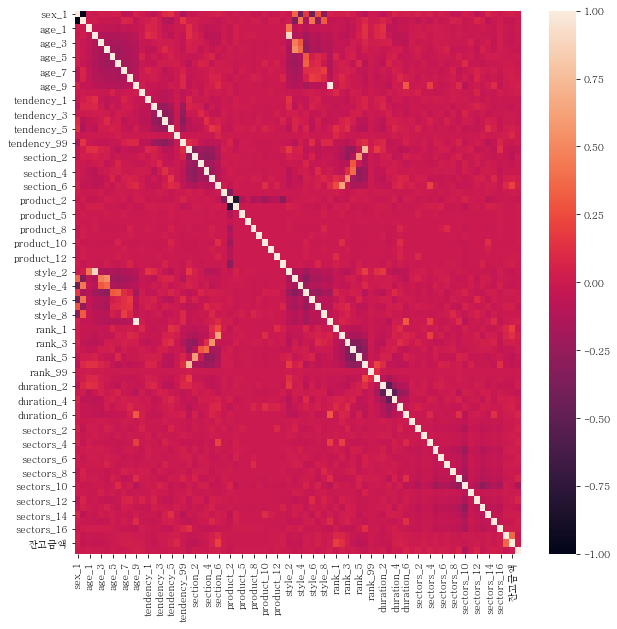

In [47]:
plt.figure(figsize = (10,10))
sns.heatmap(a)

In [48]:
dis_features = ['성별', '연령대', '투자성향', '자산구간', '주거래상품군', 'Life Style', '서비스 등급',
       '총 투자기간', '주거래업종구분']

In [49]:
get_sex=pd.get_dummies(dd['성별'], prefix='sex')
get_sex

,sex_1,sex_2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2573834,1,0
2573835,1,0
2573836,1,0
2573837,1,0


In [50]:
dd.columns

Index(['계좌ID', '성별', '연령대', '투자성향', '자산구간', '주거래상품군', 'Life Style', '서비스 등급',
       '총 투자기간', '주거래업종구분', '기준일자', '종목코드', '잔고수량', '잔고금액', '주당 액면가'],
      dtype='object')

In [51]:
dis_features = ['성별', '연령대', '투자성향', '자산구간', '주거래상품군', 'Life Style', '서비스 등급',
       '총 투자기간', '주거래업종구분']
df_dummies_discrete= pd.get_dummies(df_cus[dis_features])
df_dummies_discrete





,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,1,4,99,1,2,3,3,6,16
1,1,6,4,4,2,5,2,6,1
2,2,7,4,3,2,5,5,6,9
3,2,6,4,4,8,5,3,6,16
4,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...
9995,1,9,4,2,2,9,5,2,16
9996,2,2,3,1,2,2,9,1,16
9997,2,7,4,2,2,5,5,2,16
9998,1,5,99,5,2,5,3,2,5


In [52]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)

    
def normalize(df): 
    result = df.copy() 
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [53]:
ddd=dd.groupby(['연령대','투자성향'])['계좌ID'].count()

In [54]:
pd.DataFrame(ddd)

계좌ID
연령대 투자성향       
1   0       127
    1      4200
    2     14785
    3     10675
    4      5044
...         ...
9   2     19858
    3     22475
    4     36303
    5     26491
    99    57588

[65 rows x 1 columns]

In [55]:
df_stk

,계좌ID,기준일자,종목코드,잔고수량,잔고금액,주당 액면가
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,A005930,40.0,2320000.0,100.0
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A005930,20.0,1028000.0,100.0
...,...,...,...,...,...,...
2573834,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200806,A035720,1.0,364000.0,500.0
2573835,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200813,A035720,0.0,0.0,500.0
2573836,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200819,A035720,1.0,376500.0,500.0
2573837,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200825,A035720,0.0,0.0,500.0


In [56]:
df_cus

,계좌ID,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...
9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [57]:
df_iem['종목코드']

0       A000020
1       A000080
2       A000180
3       A000227
4       A000325
         ...   
3074    A383310
3075    A385520
3076    A388280
3077    A388420
3078    A394350
Name: 종목코드, Length: 3079, dtype: object

In [58]:
merge_df=pd.merge(df_iem[['종목코드','종목한글명']],df_stk,on='종목코드',how='right')

In [59]:
merge_df

,종목코드,종목한글명,계좌ID,기준일자,잔고수량,잔고금액,주당 액면가
0,A008770,호텔신라,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,40.0,2828000.0,5000.0
1,A008770,호텔신라,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,20.0,1390000.0,5000.0
2,A005940,NH투자증권,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,311.0,2982490.0,5000.0
3,A005930,삼성전자,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,40.0,2320000.0,100.0
4,A005930,삼성전자,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,20.0,1028000.0,100.0
...,...,...,...,...,...,...,...
2573834,A035720,카카오,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200806,1.0,364000.0,500.0
2573835,A035720,카카오,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200813,0.0,0.0,500.0
2573836,A035720,카카오,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200819,1.0,376500.0,500.0
2573837,A035720,카카오,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200825,0.0,0.0,500.0


In [60]:
samsung=merge_df[merge_df['종목한글명']=='삼성전자']
samsung

,종목코드,종목한글명,계좌ID,기준일자,잔고수량,잔고금액,주당 액면가
3,A005930,삼성전자,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,40.0,2320000.0,100.0
4,A005930,삼성전자,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,20.0,1028000.0,100.0
50,A005930,삼성전자,66d8611661423c1e0764994be4a7afe772e70a8f7f3cd2...,20180614,100.0,4820000.0,100.0
51,A005930,삼성전자,66d8611661423c1e0764994be4a7afe772e70a8f7f3cd2...,20181017,0.0,0.0,100.0
541,A005930,삼성전자,dbc7f1c8694e7a40827680f9d8b8538db774a134fa24bb...,20180704,164.0,7585000.0,100.0
...,...,...,...,...,...,...,...
2573693,A005930,삼성전자,9aca83b59ffcc920ef4d6f577e45041cf98ecc70160309...,20200713,6.0,320400.0,100.0
2573694,A005930,삼성전자,9aca83b59ffcc920ef4d6f577e45041cf98ecc70160309...,20200710,5.0,263500.0,100.0
2573695,A005930,삼성전자,9aca83b59ffcc920ef4d6f577e45041cf98ecc70160309...,20200708,4.0,212000.0,100.0
2573696,A005930,삼성전자,9aca83b59ffcc920ef4d6f577e45041cf98ecc70160309...,20200707,3.0,160200.0,100.0


<AxesSubplot:>

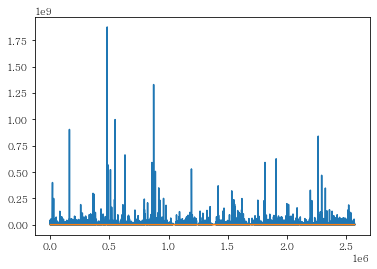

In [61]:
fig  = plt.figure(figsize=(10,10))

samsung=merge_df[merge_df['종목한글명']=='삼성전자']
ax_1=samsung['잔고금액'].plot()
samsung['주당 액면가'].plot()


<AxesSubplot:>

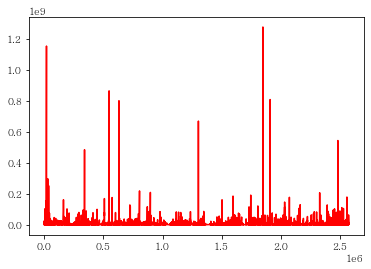

In [62]:
kakao=merge_df[merge_df['종목한글명']=='카카오']
kakao['잔고금액'].plot(c='r')

<AxesSubplot:>

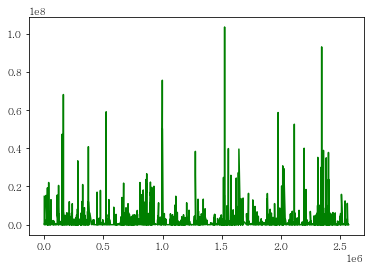

In [63]:
SFA=merge_df[merge_df['종목한글명']=='SFA반도체']
SFA['잔고금액'].plot(c='g')

In [65]:
merge_event=a.sort_values('종목코드',ascending=False)


KeyError: '종목코드'

In [66]:
df_event_=merge_event.groupby('종목한글명').filter((lambda x: x['종목코드'] > 5000.))


NameError: name 'merge_event' is not defined

In [67]:
df_event=df_event_['종목코드'].reset_index()
df_event.rename(columns={'종목코드':'count'},inplace=True)
np.log10(df_event['count'][1:])
df_event

NameError: name 'df_event_' is not defined

In [ ]:
df_event.plot()

In [ ]:
np.log10(df_event['count'][1:]).plot()

In [68]:
merge_df.groupby('기준일자')['잔고수량'].sum()

기준일자
20160104     448033.0
20160105      33335.0
20160106      72289.0
20160107      56023.0
20160108      74497.0
              ...    
20201223    6743627.0
20201224    5777331.0
20201228    5682818.0
20201229    5028410.0
20201230    5870123.0
Name: 잔고수량, Length: 1227, dtype: float64

In [69]:
merge_df

,종목코드,종목한글명,계좌ID,기준일자,잔고수량,잔고금액,주당 액면가
0,A008770,호텔신라,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,40.0,2828000.0,5000.0
1,A008770,호텔신라,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,20.0,1390000.0,5000.0
2,A005940,NH투자증권,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,311.0,2982490.0,5000.0
3,A005930,삼성전자,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,40.0,2320000.0,100.0
4,A005930,삼성전자,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,20.0,1028000.0,100.0
...,...,...,...,...,...,...,...
2573834,A035720,카카오,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200806,1.0,364000.0,500.0
2573835,A035720,카카오,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200813,0.0,0.0,500.0
2573836,A035720,카카오,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200819,1.0,376500.0,500.0
2573837,A035720,카카오,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200825,0.0,0.0,500.0


In [70]:
merge_df.groupby(merge_df['종목한글명'] =='삼전전자')['잔고금액'].sum()

종목한글명
False    1.442863e+13
Name: 잔고금액, dtype: float64

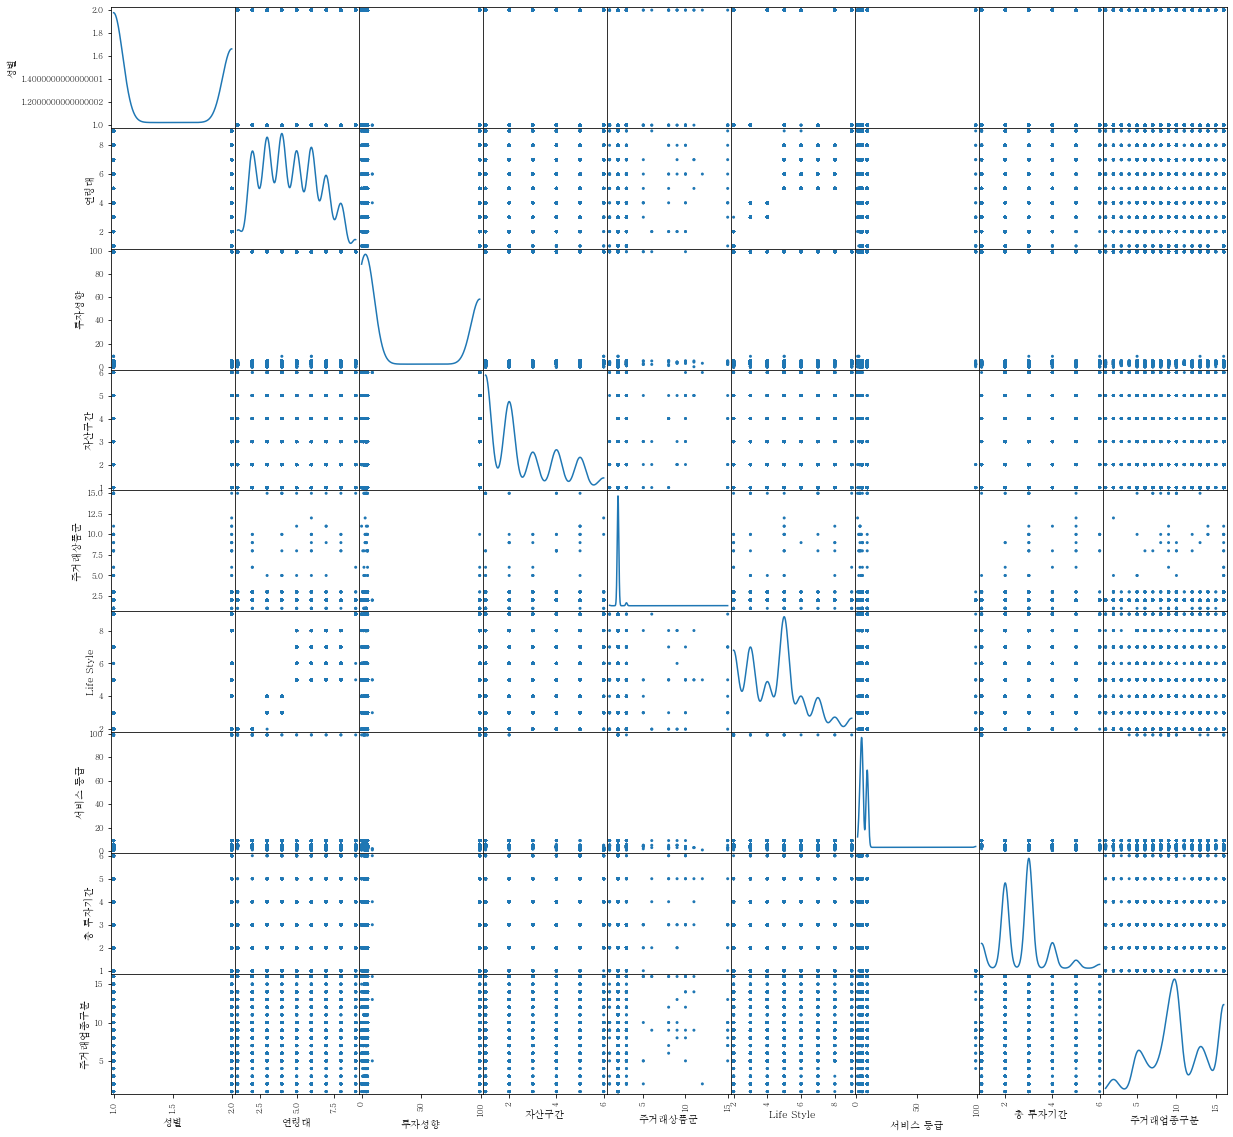

In [71]:
df_cus_drop=df_cus.drop(columns={"계좌ID"})
pd.plotting.scatter_matrix(df_cus_drop, diagonal="kde",alpha=1,figsize=(20,20))
plt.show()

<AxesSubplot:ylabel='gender_count'>

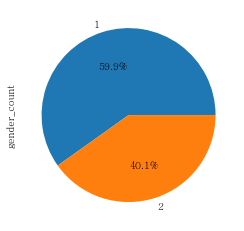

In [72]:
df_sex=df_cus.groupby('성별')["계좌ID"].count()

df_sex.plot.pie(ylabel="gender_count",autopct="%.1f%%")


In [73]:
df_cus_drop


,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,1,4,99,1,2,3,3,6,16
1,1,6,4,4,2,5,2,6,1
2,2,7,4,3,2,5,5,6,9
3,2,6,4,4,8,5,3,6,16
4,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...
9995,1,9,4,2,2,9,5,2,16
9996,2,2,3,1,2,2,9,1,16
9997,2,7,4,2,2,5,5,2,16
9998,1,5,99,5,2,5,3,2,5


In [74]:
df_cus_drop

,성별,연령대,투자성향,자산구간,주거래상품군,Life Style,서비스 등급,총 투자기간,주거래업종구분
0,1,4,99,1,2,3,3,6,16
1,1,6,4,4,2,5,2,6,1
2,2,7,4,3,2,5,5,6,9
3,2,6,4,4,8,5,3,6,16
4,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...
9995,1,9,4,2,2,9,5,2,16
9996,2,2,3,1,2,2,9,1,16
9997,2,7,4,2,2,5,5,2,16
9998,1,5,99,5,2,5,3,2,5


<AxesSubplot:xlabel='주거래업종구분', ylabel='계좌ID'>

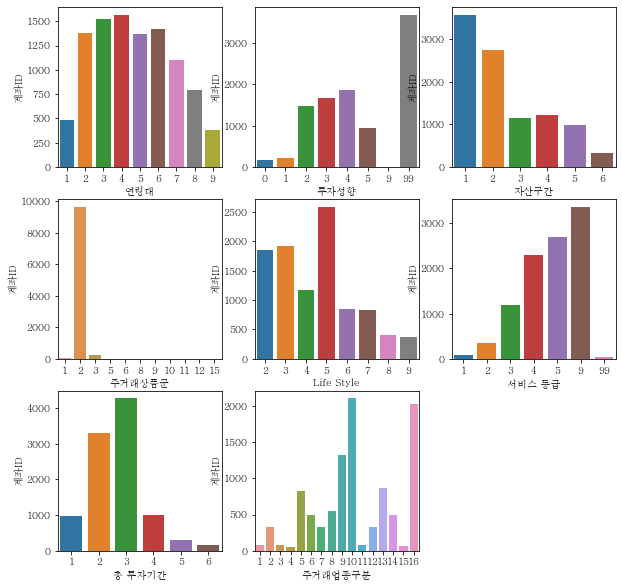

In [77]:
df_age=df_cus.groupby('연령대')["계좌ID"].count()
df_tendency=df_cus.groupby('투자성향')["계좌ID"].count()
df_section=df_cus.groupby('자산구간')["계좌ID"].count()
df_product=df_cus.groupby('주거래상품군')["계좌ID"].count()
df_style=df_cus.groupby('Life Style')["계좌ID"].count()
df_rank=df_cus.groupby('서비스 등급')["계좌ID"].count()
df_duration=df_cus.groupby('총 투자기간')["계좌ID"].count()

df_sectors=df_cus.groupby('주거래업종구분')["계좌ID"].count()

fig  = plt.figure(figsize=(10,10))

left = 0.124
right = 0.6
bottom = 0.1
top = 0.9
wspace = 0.5
hspace = 0.1


ax_1 = fig.add_subplot(3,3,1)
ax_2 = fig.add_subplot(3,3,2)
ax_3 = fig.add_subplot(3,3,3)
ax_4 = fig.add_subplot(3,3,4)
ax_5 = fig.add_subplot(3,3,5)
ax_6 = fig.add_subplot(3,3,6)
ax_7 = fig.add_subplot(3,3,7)
ax_8 = fig.add_subplot(3,3,8)

sns.barplot(x=df_age.index,y=df_age,ax=ax_1,)
sns.barplot(x=df_tendency.index,y=df_tendency,ax=ax_2)
sns.barplot(x=df_section.index,y=df_section,ax=ax_3)
sns.barplot(x=df_product.index,y=df_product,ax=ax_4)
sns.barplot(x=df_style.index,y=df_style,ax=ax_5)
sns.barplot(x=df_rank.index,y=df_rank,ax=ax_6)
sns.barplot(x=df_duration.index,y=df_duration,ax=ax_7)
sns.barplot(x=df_sectors.index,y=df_sectors,ax=ax_8)

In [76]:
df_cus.groupby(['주거래업종구분']==10).계

KeyError: False